# Matplotlib Advance - Good to know:
We have learned the most important and commonly used concepts that data scientist use in their daily work. Matplotlib provides tons of options that we don't use often, but it is good to know few of them. Keep in in your mind, you can always explore the official documentation for more resources. <br>
Let's have a look on few advance plotting concepts in this section:

**Customized ticks and their labels**<br>
We want to put the ticks explicitly, we can do this using  `set_xticks` and `set_yticks`. Both take a list of values for where on the axis the ticks are to be placed. <br>
`set_xticklabels` and `set_yticklabels` methods can be used for custom labels for each tick location. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
x=np.arange(6)
y = x ** 2

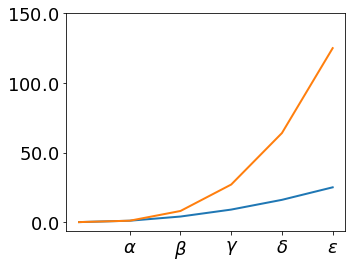

In [2]:
fig, axes = plt.subplots(figsize=(5,4))

axes.plot(x, x**2, x, x**3, lw=2)

axes.set_xticks([1, 2, 3, 4, 5])
axes.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'],
                     fontsize=18)

yticks = [0, 50, 100, 150]
axes.set_yticks(yticks)
axes.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

Number of more advanced methods for controlling major and minor tick placement, such as automatic placement according to different policies. [See](http://matplotlib.org/api/ticker_api.html) for details.

**Logarithmic scale**<br>
We can set the logarithmic scale for one or both axes using `set_xscale` and `set_yscale` methods, which accept one parameter ("log" in this case).

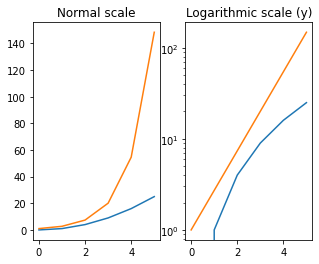

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(5,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

**Scientific notation**<br>
You have large numbers on your axes, use the scientific notation.

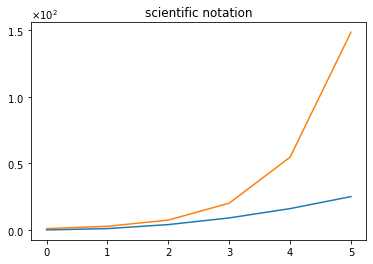

In [4]:
fig, axes = plt.subplots()
      
axes.plot(x, x**2, x, np.exp(x))
axes.set_title("scientific notation")

axes.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter) 

**Axis number and axis label spacing**<br>

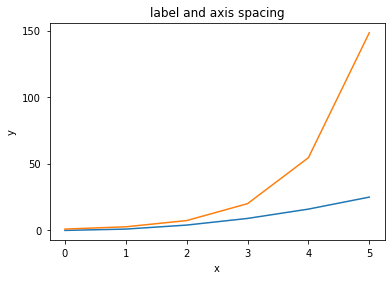

In [5]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, axes = plt.subplots(1, 1)
      
axes.plot(x, x**2, x, np.exp(x))
axes.set_yticks([0, 50, 100, 150])

axes.set_title("label and axis spacing")

# padding between axis label and axis numbers
axes.xaxis.labelpad = 5
axes.yaxis.labelpad = 5

axes.set_xlabel("x")
axes.set_ylabel("y");

In [6]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

**Axis position adjustments**<br>
This can be done using `subplots_adjust` to avoid unnecessary clipping while saving the figures.

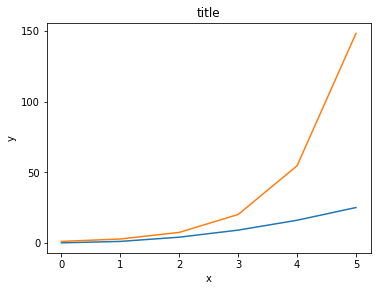

In [7]:
fig, axes = plt.subplots(1, 1)
      
axes.plot(x, x**2, x, np.exp(x))
axes.set_yticks([0, 50, 100, 150])

axes.set_title("title")
axes.set_xlabel("x")
axes.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

**Axis grid**<br>
`grid` method can be used to turn on and off grid lines. We can also customize the appearance of the grid lines as well!

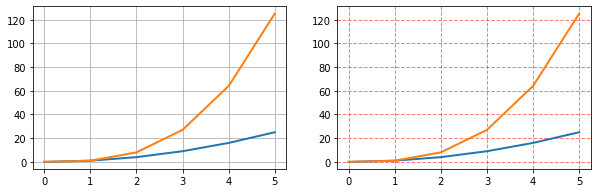

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# customized grid
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='r', linestyle='--', linewidth=1, alpha=0.5)

**Dual/twin axes**<br>
Matplotlib supports this feature with the `twinx` and `twiny` functions to plot data with different units together.

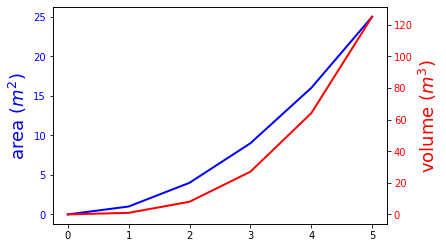

In [9]:
fig, axes1 = plt.subplots()

axes1.plot(x, x**2, lw=2, color="blue")
axes1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in axes1.get_yticklabels():
    label.set_color("blue")
    
axes2 = axes1.twinx()
axes2.plot(x, x**3, lw=2, color="red")
axes2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in axes2.get_yticklabels():
    label.set_color("red")

**We can also change the properties of axis spines using `spines()`**

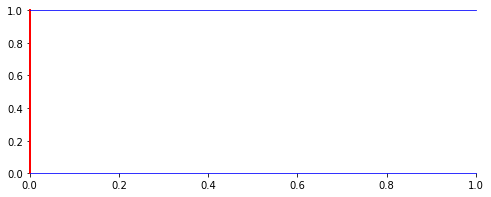

In [10]:
fig, axes = plt.subplots(figsize=(8,3))

axes.spines['bottom'].set_color('blue')
axes.spines['top'].set_color('blue')

axes.spines['left'].set_color('red')
axes.spines['left'].set_linewidth(2)

# turn off axis spine to the right
axes.spines['right'].set_color("none")

# only ticks on the left side
axes.yaxis.tick_left() 

**x and y through the origin**<br>
x and y are zero

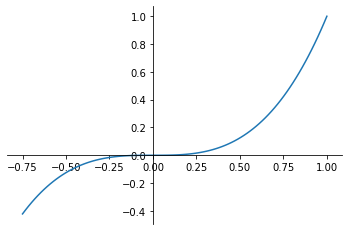

In [11]:
fig, axes = plt.subplots()

axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')

axes.xaxis.set_ticks_position('bottom')

# setting position of x spine to x=0
axes.spines['bottom'].set_position(('data',0)) 

axes.yaxis.set_ticks_position('left')

# setting position of y spine to y=0
axes.spines['left'].set_position(('data',0))   

xx = np.linspace(-0.75, 1., 100)
axes.plot(xx, xx**3);

**Some useful 2D plots -- `scatter(), step(), bar(), fill_between()`**<br>
For complete list of available plot types, click [here](https://matplotlib.org/gallery/index.html)

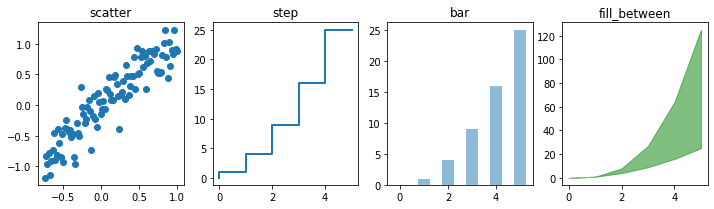

In [12]:
n = np.arange(0,6)
fig, axes = plt.subplots(1, 4, figsize=(12,3))

# Scatter plot
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

# Step plot
axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

# Bar plot
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

# Fill_between
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

**`text` function provides way to annotate text in matplotlib figures.**

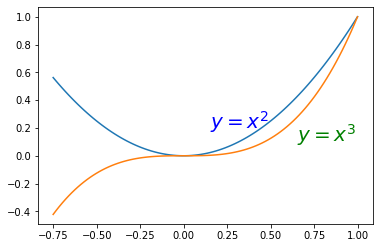

In [13]:
fig, axes = plt.subplots()

axes.plot(xx, xx**2, xx, xx**3)

axes.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
axes.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

**Figures with multiple subplots and insets using `subplots()`, `subplot2grid()`, and `gridspec()`**<br>

<code>**subplots()**</code>

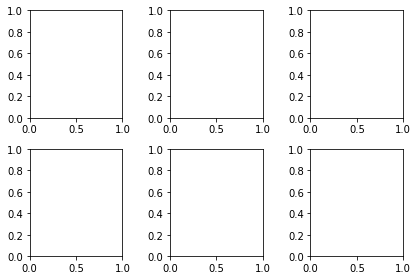

In [14]:
fig, axes = plt.subplots(2, 3)
fig.tight_layout()

<code>**subplot2grid()**</code>

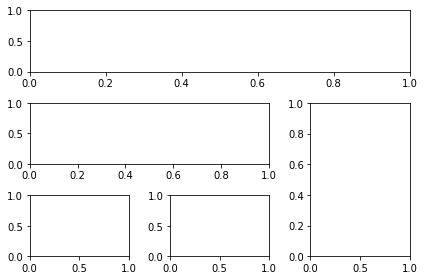

In [15]:
fig = plt.figure()
axes1 = plt.subplot2grid((3,3), (0,0), colspan=3)
axes2 = plt.subplot2grid((3,3), (1,0), colspan=2)
axes3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
axes4 = plt.subplot2grid((3,3), (2,0))
axes5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

<code>**gridspec**</code>

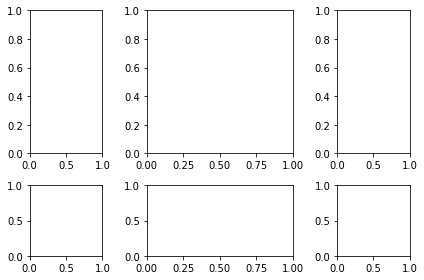

In [16]:
# gridspec
import matplotlib.gridspec as gridspec
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

**`add_axes()` is useful for adding insets to figures manually.**

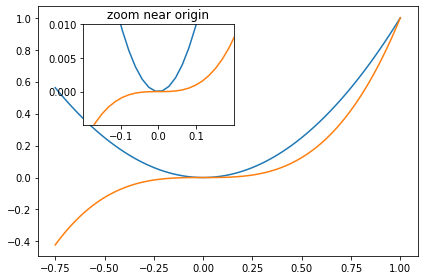

In [17]:
fig, axes = plt.subplots()

axes.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset plot
inset_axes = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_axes.plot(xx, xx**2, xx, xx**3)
inset_axes.set_title('zoom near origin')

# setting axis range
inset_axes.set_xlim(-.2, .2)
inset_axes.set_ylim(-.005, .01)

# setting axis tick locations
inset_axes.set_yticks([0, 0.005, 0.01])
inset_axes.set_xticks([-0.1,0,.1]);

**Colormaps and contour** figures are very useful for plotting functions of two variables. In most of these functions we encode one dimension of the data using a colormap. <br>
Let's learn with a simple example:

In [18]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [19]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

<code>**pcolor()**</code>

c:\users\hp\.conda\envs\march2021\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


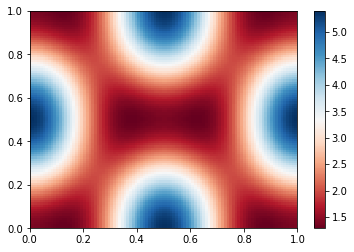

In [20]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

<code>**imshow()**</code>

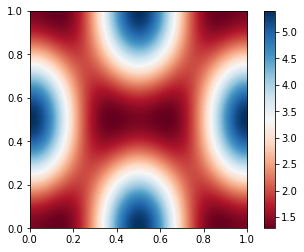

In [21]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

<code>**contour()**</code>

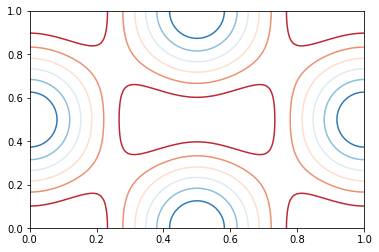

In [22]:
# contour
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

**3D graphics in matplotlib is possible**<br>
first, create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [23]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

<code>**plot_surface()**</code>

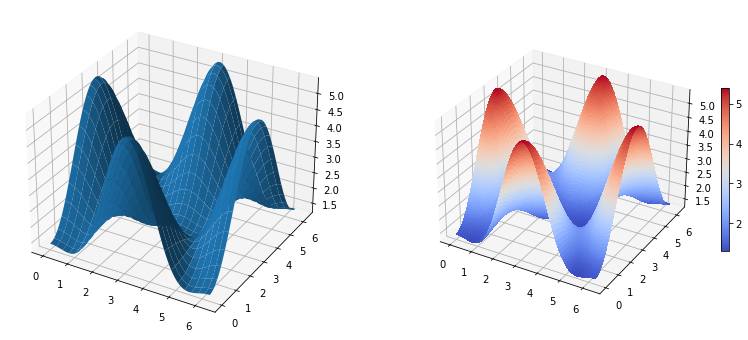

In [24]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

<code>**plot_wireframe()**</code>

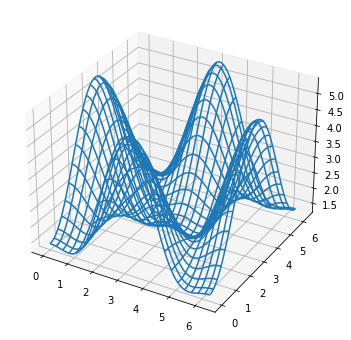

In [25]:
# Wire-frame plot
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

**Coutour plots with projections**

In [ ]:
fig = plt.figure(figsize=(8,6))

axes = fig.add_subplot(1,1,1, projection='3d')

axes.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = axes.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = axes.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = axes.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

axes.set_xlim3d(-np.pi, 2*np.pi);
axes.set_ylim3d(0, 3*np.pi);
axes.set_zlim3d(-np.pi, 2*np.pi);